In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("/content/24-hours Delhi Power Consumption dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8737 non-null   int64  
 1   timestamp            8737 non-null   object 
 2   day_of_week          8737 non-null   int64  
 3   hour_of_day          8737 non-null   int64  
 4   is_weekend           8737 non-null   int64  
 5   temperature          8737 non-null   float64
 6   is_holiday           8737 non-null   int64  
 7   solar_generation     8737 non-null   float64
 8   load                 8737 non-null   int64  
 9   compensation_method  8737 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 682.7+ KB


In [ ]:
df.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.set_index('timestamp', inplace=True)

In [ ]:
df.head()

,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
timestamp,,,,,,,,
2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [ ]:
df['lag_1'] = df['load'].shift(1)        # previous hour load
df['lag_24'] = df['load'].shift(24)      # previous day same hour
df['rolling_24hr'] = df['load'].rolling(window=24).mean()

df.dropna(inplace=True)

In [ ]:
df.head()

,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method,lag_1,lag_24,rolling_24hr
timestamp,,,,,,,,,,,
2023-01-02 00:00:00,0,0,0,12.278086,0,1.951520,17352,Normal Operation,18717.0,18493.0,19227.458333
2023-01-02 01:00:00,0,1,0,15.554613,0,7.754172,16108,Normal Operation,17352.0,17090.0,19186.541667
2023-01-02 02:00:00,0,2,0,9.245032,0,2.618596,15179,Normal Operation,16108.0,16052.0,19150.166667
2023-01-02 03:00:00,0,3,0,16.878490,0,4.490350,14519,Normal Operation,15179.0,15356.0,19115.291667
2023-01-02 04:00:00,0,4,0,11.996807,0,1.516714,14107,Normal Operation,14519.0,14936.0,19080.750000


In [ ]:
train_size = int(len(df) * 0.8)

train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
features = ['day_of_week', 'hour_of_day', 'is_weekend', 'temperature',
            'solar_generation', 'is_holiday', 'lag_1', 'lag_24', 'rolling_24hr']

X_train = train[features]
y_train = train['load']

X_test = test[features]
y_test = test['load']

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [ ]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [ ]:
def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    return mae, rmse

print("Linear Regression:", evaluate(y_test, pred_lr))
print("Random Forest:", evaluate(y_test, pred_rf))
print("XGBoost:", evaluate(y_test, pred_xgb))

Linear Regression: (416.2319837785519, np.float64(533.9215880817))
Random Forest: (220.87665519219738, np.float64(289.97002515602287))
XGBoost: (193.56201171875, np.float64(255.12020757380236))


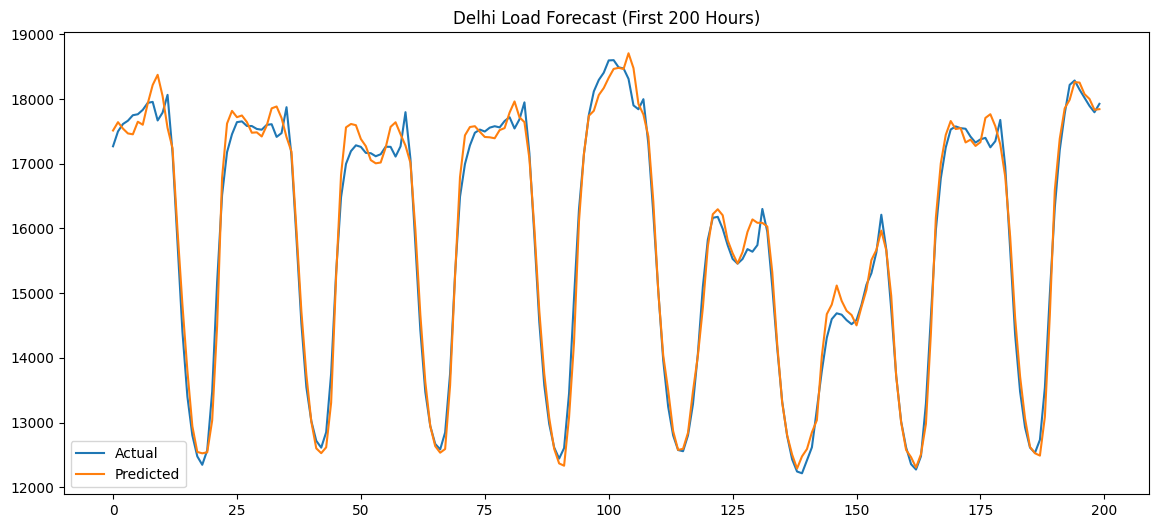

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(pred_xgb[:200], label="Predicted")
plt.title("Delhi Load Forecast (First 200 Hours)")
plt.legend()
plt.show()

In [ ]:
future = df.tail(24).copy()

future['lag_1'] = future['load'].shift(1)
future['lag_24'] = future['load'].shift(24)
future['rolling_24hr'] = future['load'].rolling(24).mean()
future.dropna(inplace=True)

future_pred = xgb.predict(future[features])
print("Next 24 hours forecast:", future_pred)

Next 24 hours forecast: []


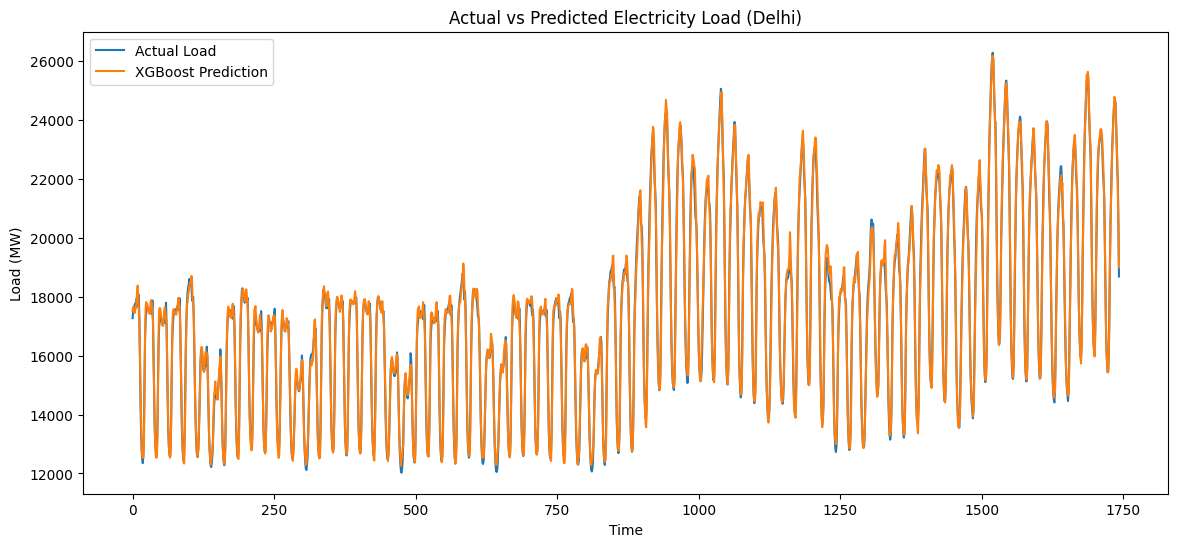

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual Load")
plt.plot(pred_xgb, label="XGBoost Prediction")
plt.title("Actual vs Predicted Electricity Load (Delhi)")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

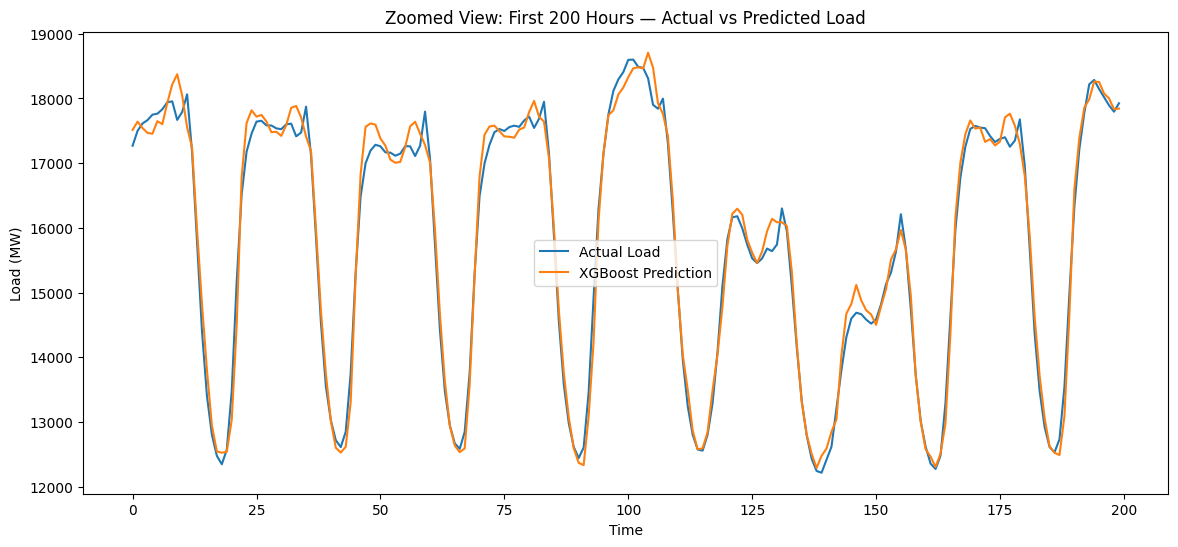

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values[:200], label="Actual Load")
plt.plot(pred_xgb[:200], label="XGBoost Prediction")
plt.title("Zoomed View: First 200 Hours — Actual vs Predicted Load")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

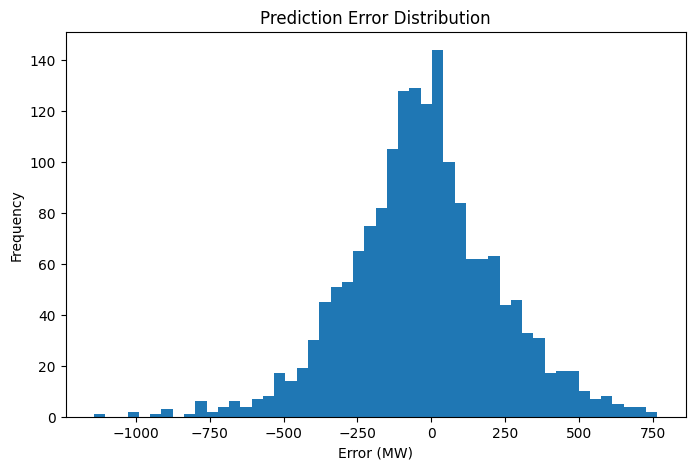

In [ ]:
errors = y_test - pred_xgb

plt.figure(figsize=(8,5))
plt.hist(errors, bins=50)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (MW)")
plt.ylabel("Frequency")
plt.show()

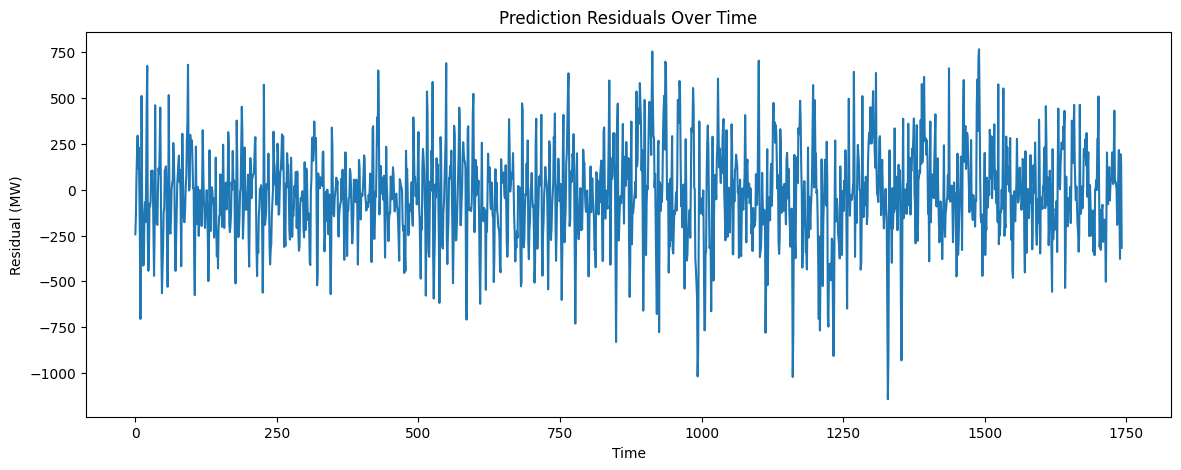

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(errors.values)
plt.title("Prediction Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residual (MW)")
plt.show()

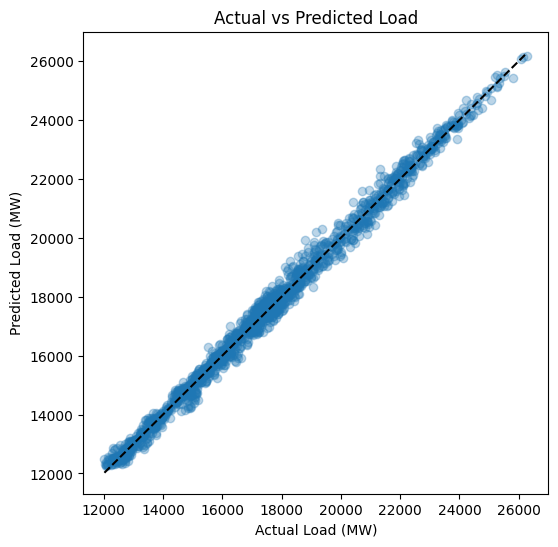

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_xgb, alpha=0.3)
plt.title("Actual vs Predicted Load")
plt.xlabel("Actual Load (MW)")
plt.ylabel("Predicted Load (MW)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()